<img src="Images/Ballenas_logo.jpg">
# BSS Cube Satellite Payload Data Analysis

## Relay Pi

This notebook displays data collected from one of the Raspberry Pi 3 Model B's. This pi will be running the computational program and program that will turn turn a mechanical relay on and off. The relay will be turning an LED on and off and will be recorded by the Pi Camera.  

### Description of Computational Program
To meet the desires of the science team, software devised a computational program that would calculate a set equation while printing the time it took to calculate each iteration. The equation used is 'x^2' where x increases by 1 each time. By choosing an equation for the pi to calculate, it can be easily analyzed by graphing and checking for anomlies. Due to the size of the files and the worry of the memory overfilling, data is written to a new file every five minutes. If the pi turns off during the flight, the data will not overwrite the previous files. 

## Static Test
This static test will be compared to the data we collect from the satellite and serve as a benchmark for the pi to follow. 

In [1]:
#import of libraries.
#this cell must be ran each time the notebook is started.
import pandas as pd
import numpy as np
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# these next fews cells imports the following datafiles from the computational program
data0s = pd.read_csv('Datafiles/CompStatic/calcresults0static.txt')
#data0s.info()
data1s = pd.read_csv('Datafiles/CompStatic/calcresults1static.txt')
#data1s.info()
data2s = pd.read_csv('Datafiles/CompStatic/calcresults2static.txt')
#data2s.info()

In [3]:
datastatic = pd.concat([data0s, data1s, data2s]) # this will combine the three datafiles into one
datastatic.info()
iterationstatic = datastatic['iteration'] # assign data to a variable to be called up later
timestatic = datastatic['time']
resultstatic = datastatic['result']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151485 entries, 0 to 1042819
Data columns (total 3 columns):
iteration    int64
time         float64
result       int64
dtypes: float64(1), int64(2)
memory usage: 96.2 MB


### Static Analysis
The cells below will analyze the data and attempt to find points of failure for the performance of the pi. If points of failure are found, they can be anaylzed in greater depth. The data collected from this pi includes one set of files from the computational program which includes three variables; iteration, time and result. Iteration runs through from 0+ and is plugged in as 'x' into the equation 'x^2'. The result is the answer to this equation and the time is printed for every iteration calculated. The data below is from a static test and will be compared to the data from the satellite.

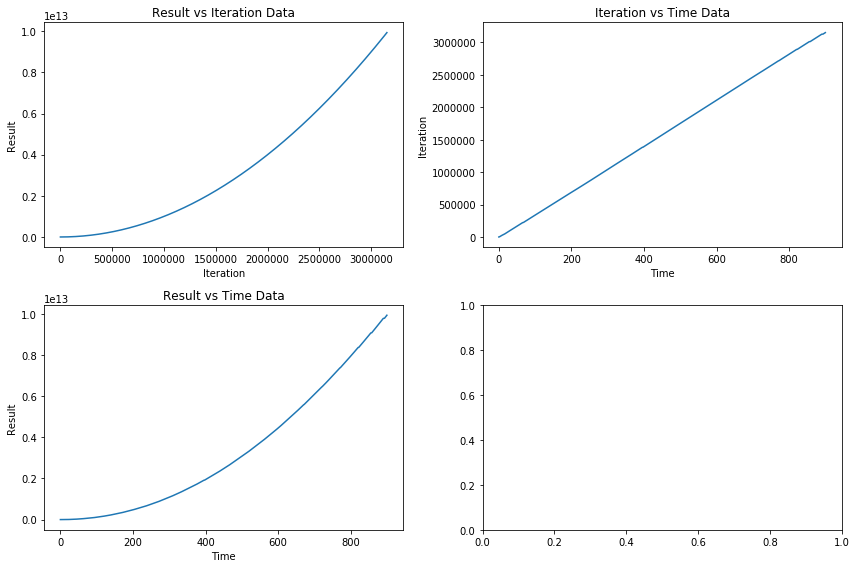

In [4]:
#this cell plots the data as the result as a function of the iteration
fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationstatic, resultstatic)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timestatic, iterationstatic)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timestatic, resultstatic)
      
fig.tight_layout()
plt.show()

In [5]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result
maxRS = max(resultstatic)
maxIS = max(iterationstatic)
maxTS = max(timestatic)
if max(resultstatic) == (max(iterationstatic)**2):
    print('The program calculated the equation properly.')
else:
    print('Program didnt properly calculate the equation')

The program calculated the equation properly.


In [6]:
# finding the time it took the program to write the amount of iterations
maxminS = maxTS/60
print('It took',maxTS,'seconds or',maxminS,'minutes to calculate ', maxIS,'iterations.')

It took 900.000367403 seconds or 15.0000061234 minutes to calculate  3151484 iterations.


## Computational Program Analysis From Satellite
The cells below will upload the files and analyze the data collected while also comparing it to the static test. 

In [17]:
# these next fews cells imports the following datafiles from the computational program
#change the location name of the file folder
#add/remove however many files there is

data0 = pd.read_csv('Datafiles/Relay/calcresults0.txt')
#data0.info()

data1 = pd.read_csv('Datafiles/Relay/calcresults1.txt')
#data1.info()

data2 = pd.read_csv('Datafiles/Relay/calcresults2.txt')
#data2.info()

data3 = pd.read_csv('Datafiles/Relay/calcresults3.txt')
#data3.info()

data4 = pd.read_csv('Datafiles/Relay/calcresults4.txt')
#data4.info()

data5 = pd.read_csv('Datafiles/Relay/calcresults5.txt')
#data5.info()

data6 = pd.read_csv('Datafiles/Relay/calcresults6.txt')
#data6.info()

data7 = pd.read_csv('Datafiles/Relay/calcresults7.txt')
#data7.info()

data8 = pd.read_csv('Datafiles/Relay/calcresults8.txt')
#data8.info()

data9 = pd.read_csv('Datafiles/Relay/calcresults9.txt')
#data9.info()

data10 = pd.read_csv('Datafiles/Relay/calcresults10.txt')
#data10.info()

data11 = pd.read_csv('Datafiles/Relay/calcresults11.txt')
#data11.info()

data12 = pd.read_csv('Datafiles/Relay/calcresults12.txt')
#data12.info()

In [8]:
# this will combine all the datafiles into one
dataC = pd.concat([data0, data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12]) 
dataC.info()
iterationC = dataC['iteration'] # assign data to a variable to be called up later
timeC = dataC['time']
resultC = dataC['result']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6865423 entries, 0 to 72452
Data columns (total 3 columns):
iteration    int64
time         float64
result       float64
dtypes: float64(2), int64(1)
memory usage: 209.5 MB


### Graphical Analysis
Remember, the computational program calculates the equation x^2 so by graphing the data, discrepancies in the data be can easily spotted.

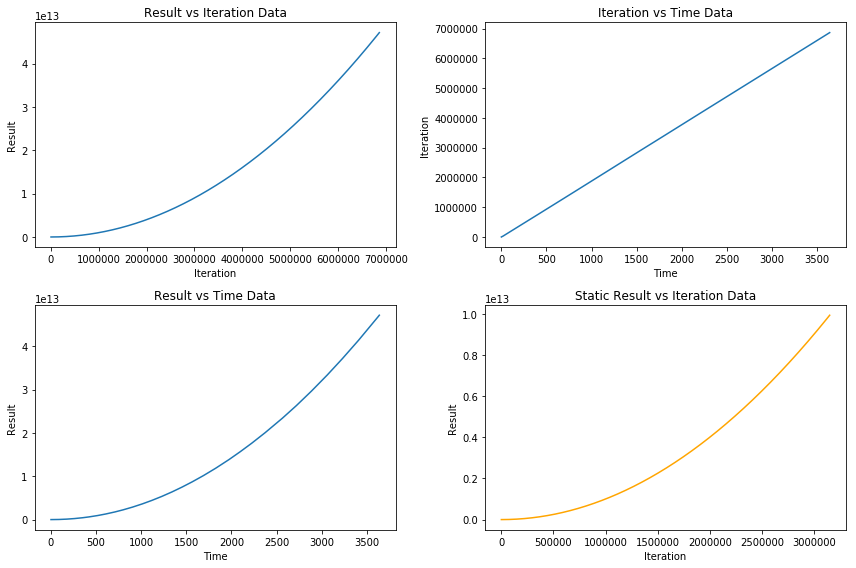

In [9]:
#this cell plots the data as the result as a function of the iteration
fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationC, resultC)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timeC, iterationC)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timeC, resultC)

plot4.set_xlabel('Iteration')
plot4.set_ylabel('Result')
plot4.set_title('Static Result vs Iteration Data')
plot4.plot(iterationstatic, resultstatic, color='orange')
      
fig.tight_layout()
plt.show()

### Other Analytics
The cells below will determine other points of failure and display how long the Pi ran for before shutting off.

In [10]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result
maxR = max(resultC)
maxI = max(iterationC)
maxT = max(timeC)
if max(resultC) == (max(iterationC-1)**2):                  # sometimes you will have to add '-1' after iteration because when the pi
    print('The program calculated the equation correctly.') # shuts off, it might not write the entire line in the file so you have
else:                                                       # to take the second last iteration
    print('Program didnt properly calculate the equation')

The program calculated the equation correctly.


In [11]:
# finding the time it took the program to write the total amount of iterations
maxmin = maxT/60
print('The Pi ran for',maxT,'seconds or',maxmin,'minutes and calculated', maxI,'iterations during that time.')

The Pi ran for 3638.25728416 seconds or 60.6376214027 minutes and calculated 6865422 iterations during that time.


In [12]:
# this cell will compare the amount of time it took to calculate the equation to the static
staticC = (maxTS/maxIS)*100000
testC = (maxT/maxI)*100000
print('The static test calculated 100,000 iterations in',staticC,'seconds while the pi from the satellite did so in', testC,'seconds.')

The static test calculated 100,000 iterations in 28.5579862504 seconds while the pi from the satellite did so in 52.9939351749 seconds.


## Relay Analysis
The datafile collected from the program that switched the relay contained two variables: time and on/off where it printed 0 for off and 1 for one. 

In [13]:
# loading datafile using pandas
dataR = pd.read_csv('Datafiles/Relay/RelayLog0.txt')
dataR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 2 columns):
time      7266 non-null float64
on/off    7266 non-null int64
dtypes: float64(1), int64(1)
memory usage: 113.6 KB


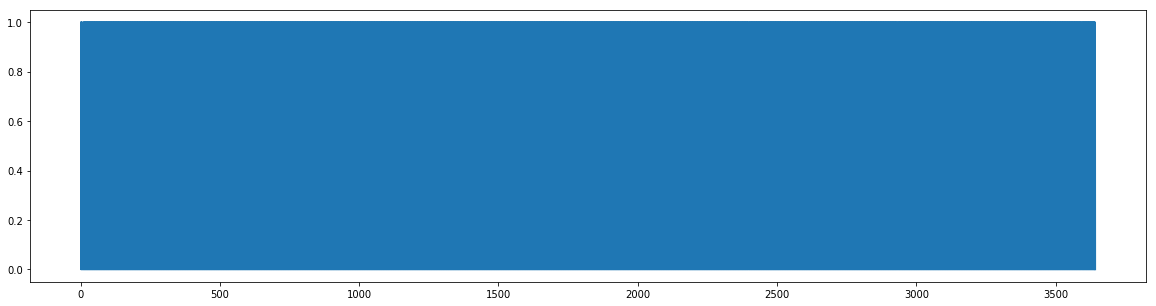

In [14]:
# assigns the data to a variable
plt.figure(figsize=(20,5))
timeR = dataR['time']
on_off = dataR['on/off']
plt.plot(timeR, on_off) # plot on_off vs time

In [15]:
# finds the time the relay program ran for
max_timeR = max(timeR) # max time in seconds
max_timeRmin = max_timeR/60 # max time in minutes
print('The relay program ran for',max_timeR,'seconds or',max_timeRmin,'minutes.')

The relay program ran for 3642.86402678 seconds or 60.7144004464 minutes.


In [16]:
# compare the time each program ran for
Rd = {'Programs': ['Comp.', 'Relay'],'Time': [maxT, max_timeR]}
Relaydf = pd.DataFrame(data=Rd)
Relaydf

,Programs,Time
0,Comp.,3638.257284
1,Relay,3642.864027
